In [1]:
import os
import geopandas
import logging
import pandas as pd
import io
import subprocess
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patheffects as path_effects
import folium
from folium.plugins import HeatMap

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts
try:
    from PT3S import Rm
except:
    import Rm
try:
    from PT3S import ncd
except:
    import ncd

In [2]:
import inspect

# Print the source code of the module
#print(inspect.getsource(ncd))


In [3]:
import logging

logger = logging.getLogger()

logFileName = r"pNcd_DH.log"

loglevel = logging.DEBUG
logging.basicConfig(
    filename=logFileName,
    filemode='w',
    level=loglevel,
    format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s ; [%(filename)s:%(lineno)d - %(funcName)s]"
)

fileHandler = logging.FileHandler(logFileName)
logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s ; [%(filename)s:%(lineno)d - %(funcName)s]"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)


In [4]:
dbFilename="Example5"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [5]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True

)
#NBVAL_IGNORE_OUTPUT

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example5.db3 exists readable ... ; [Dx.py:322 - __init__]
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example5.db3 is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model ; [dxAndMxHelperFcts.py:1640 - readDxAndMx]
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.XML is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SirCalc's xmlFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model ; [dxAndMxHelperFcts.py:1652 - readDxAndMx]
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MXS reading ... ; [Mx.py:2156 - setResultsToMxsFile]
INFO    ; dxWithMx.__init__: Example5: processing dx and mx ... ; [dxAndMxHelperFcts.py:115 - __init__]
ERR

In [6]:
gdf_ROHR=m.gdf_ROHR

In [7]:
gdf_FWVB=m.gdf_FWVB

In [8]:
gdf_KNOT=m.gdf_KNOT

In [9]:
data1 = ncd.NcdD_pipes(gdf=gdf_ROHR
                       ,attr_colors='DI'
                       ,colors = ['lightgray', 'dimgray']
                       ,line_width=10
                       ,patch_fmt = "DN (Innen) {:4.0f}"
                       ,patch_values = [100,300,400,500,700] 
                       ,legend_pos='upper right'
                       ,ignore_values=[])

In [10]:
data2 = ncd.NcdD_pipes(gdf=gdf_ROHR
                       ,attr_colors='QMAVAbs'
                       ,colors = ['darkgreen','magenta']
                       ,line_width=10
                       ,patch_fmt = "Q (abs.) {:4.0f} t/h"
                       ,legend_pos='upper left')

In [11]:
data3 = ncd.NcdD_nodes(gdf=gdf_FWVB
                       ,attr_colors='QM'
                       ,colors = ['aquamarine','teal'] 
                       ,patch_fmt = "QM {:4.0f} ##" 
                       ,legend_pos='lower left'
                       ,marker_size=1000
                       ,marker_style='p')

In [12]:
data4 = ncd.NcdD_nodes(gdf=gdf_FWVB
                       ,attr_colors='QM'
                       ,colors = ['oldlace', 'orange'] 
                       ,patch_fmt = "W {:4.0f} kW" 
                       ,legend_pos='lower right'
                       ,marker_size=500
                       ,marker_style='o')

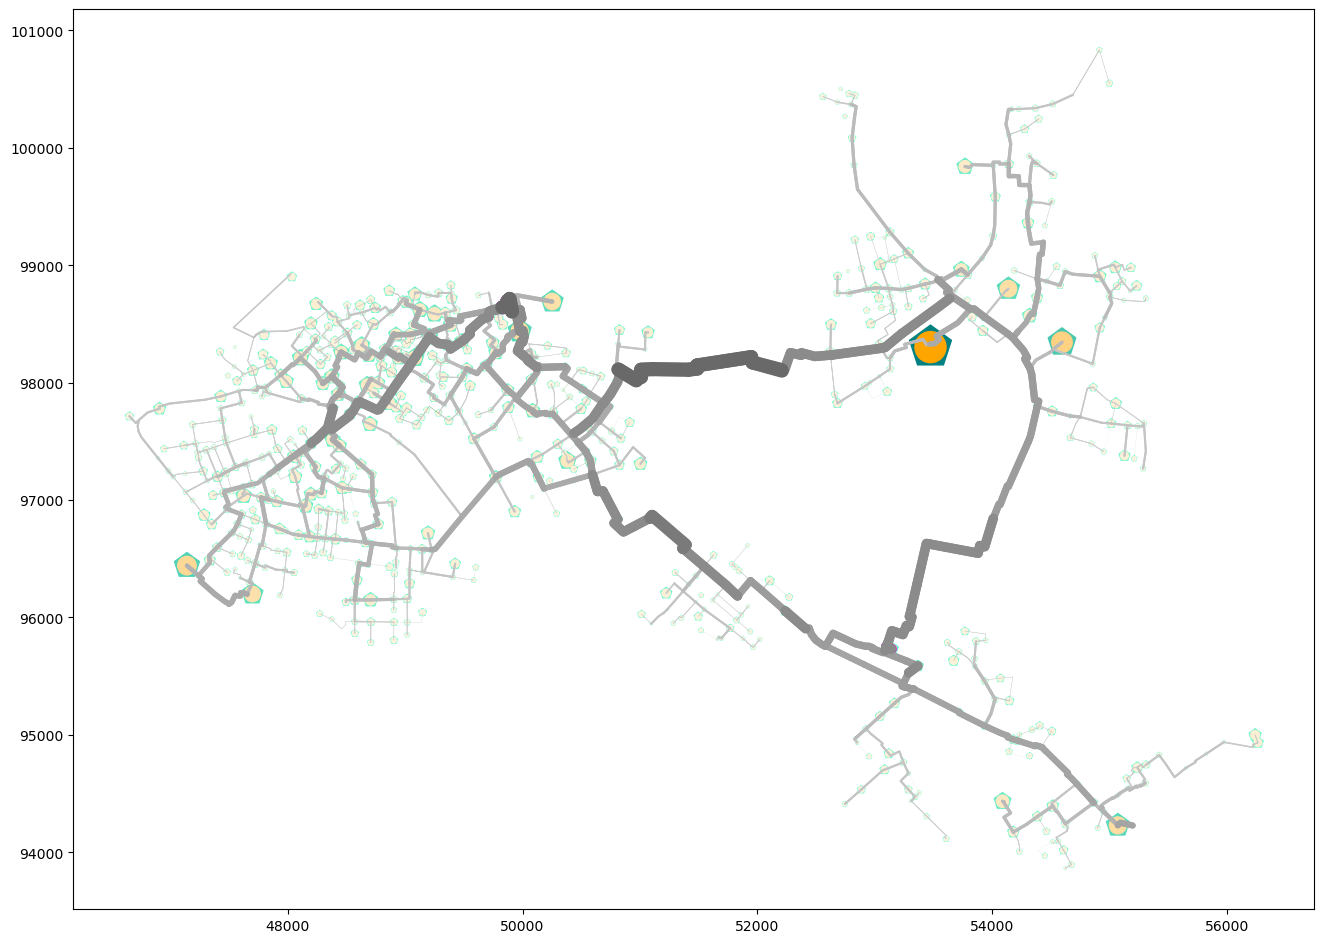

In [13]:
fig, ax = plt.subplots(figsize=Rm.DINA3q)

ncd.pNcd_pipes(ax=ax, NcdD=data2)
ncd.pNcd_nodes(ax=ax, NcdD=data3)

ncd.pNcd_pipes(ax=ax, NcdD=data1)
ncd.pNcd_nodes(ax=ax, NcdD=data4)

plt.show()

In [14]:
gdf_FWVB.head()

pk                 fkDE                   rk  \
0  4763381653027226237  5613149064237404433  4763381653027226237   
1  4786305463718814320  5613149064237404433  4786305463718814320   
2  4759778559679762263  5613149064237404433  4759778559679762263   
3  5711831736757323289  5613149064237404433  5711831736757323289   
4  5206491772719112804  5613149064237404433  5206491772719112804   

                    tk                 fkKI                 fkKK  \
0  5355473162724001848  5752795237911723917  5318895762043832589   
1  5365051455387902528  4705609281536667867  5534707761536965935   
2  5150808675185981840  4639697450138522427  4704487703341445808   
3  5454224697204663514  5583320901331694417  5463816719538176165   
4  4881006258677472063  5589444629936125830  5569352159901671756   

                                        BESCHREIBUNG           W0   TVL0  \
0  groesster FWVB von MEHRFACH-FWVB am selben Kno...   777.599976  130.0   
1  groesster FWVB von MEHRFACH-FWVB am selben Kno...    52.770000  130.0   
2  groesster FWVB von MEHRFACH-FWVB am selben Kno...   592.500000  130.0   
3  groesster FWVB von MEHRFACH-FWVB am selben Kno...  1637.949997  130.0   
4  groesster FWVB von MEHRFACH-FWVB am selben Kno...   688.230007  130.0   

   TRS0  ...  \
0  55.0  ...   
1  55.0  ...   
2  55.0  ...   
3  55.0  ...   
4  55.0  ...   

   ('STAT', 'KNOT~*~*~*~H', Timestamp('2024-01-09 23:00:00'), Timestamp('2024-01-09 23:00:00'))_i  \
0                                           8.967417                                                
1                                           7.861287                                                
2                                           8.561563                                                
3                                           7.847238                                                
4                                            7.63065                                                

   ('STAT', 'KNOT~*~*~*~T', Timestamp('2024-01-09 23:00:00'), Timestamp('2024-01-09 23:00:00'))_i  \
0                                         129.453857                                                
1                                         117.036072                                                
2                                         126.425049                                                
3                                          129.47345                                                
4                                         129.372284                                                

   ('STAT', 'KNOT~*~*~*~RHO', Timestamp('2024-01-09 23:00:00'), Timestamp('2024-01-09 23:00:00'))_i  \
0                                         935.691528                                                  
1                                         945.871155                                                  
2                                         938.217468                                                  
3                                         935.673889                                                  
4                                         935.764954                                                  

   ('STAT', 'KNOT~*~*~*~PH', Timestamp('2024-01-09 23:00:00'), Timestamp('2024-01-09 23:00:00'))_k  \
0                                            4.79259                                                 
1                                           5.690005                                                 
2                                           5.679823                                                 
3                                           5.837118                                                 
4                                           5.903327                                                 

   ('STAT', 'KNOT~*~*~*~H', Timestamp('2024-01-09 23:00:00'), Timestamp('2024-01-09 23:00:00'))_k  \
0                                            4.94955                                                


In [15]:
print(gdf_FWVB.columns)

Index([                                                                                              'pk',
                                                                                                   'fkDE',
                                                                                                     'rk',
                                                                                                     'tk',
                                                                                                   'fkKI',
                                                                                                   'fkKK',
                                                                                           'BESCHREIBUNG',
                                                                                                     'W0',
                                                                                                   'TVL0',
                                     

In [16]:
print(gdf_KNOT.columns)

Index([                                                                      'pk',
                                                                           'fkDE',
                                                                             'rk',
                                                                             'tk',
                                                                           'NAME',
                                                                           'KTYP',
                                                                           'XKOR',
                                                                           'YKOR',
                                                                           'ZKOR',
                                                                         'QM_EIN',
       ...
              ('STAT', 'KNOT~*~*~*~PH', 2024-01-09 23:00:00, 2024-01-09 23:00:00),
          ('STAT', 'KNOT~*~*~*~PH_EIN', 2024-01-09 23:00:00, 2024-01-09 23:0